# Mouvement brownien

Premièrement théorisé par Einstein en 1905, le mouvement brownien est le mouvement aléatoire de particules microscopiques en suspension dans un fluide (liquide ou gaz). Causé par les collisions incessantes entre les particules en suspension et les molécules du fluide environnant, ce phénomène a été pour la première fois décrit mathématique par Langevin en 1908. On se propose ici, à travers diverses simulations numériques, d'illustrer ce phénomène physique fondamental.

## Equation de Langevin
L'équation de Langevin décrit le mouvement d'une particule soumise à des forces aléatoires. Elle s'écrit sous la forme suivante :
$$m \frac{d^2 x(t)}{dt^2} = -\gamma \frac{dx(t)}{dt} + f(x) + \eta(t)$$
où :
- $m$ est la masse de la particule,
- $\gamma$ est le coefficient de friction,
- $f(x)$ est une force externe appliquée à la particule (et ne dépendant pas du temps),
- $\eta(t)$ est une force aléatoire représentant les collisions entre particules, dont l'intensité dependant essentiellement de la température.

## Cas de sur-amortissement
Prenons premièrement le cas de sur-amortissement, où l'on peut négliger le terme d'inertie. L'équation de Langevin se simplifie alors en :
$$\gamma \frac{dx(t)}{dt} = f(x) + \eta(t)$$

On peut également la réécrire sous la forme d'une équation différentielle stochastique (EDS) :
$$dx(t) = \frac{f(x)}{\gamma} dt + \sqrt{2Ddt} R(t)$$
avec $D$ le coefficient de diffusion, et $R(t)$ un bruit blanc gaussien de moyenne nulle et de variance unitaire.



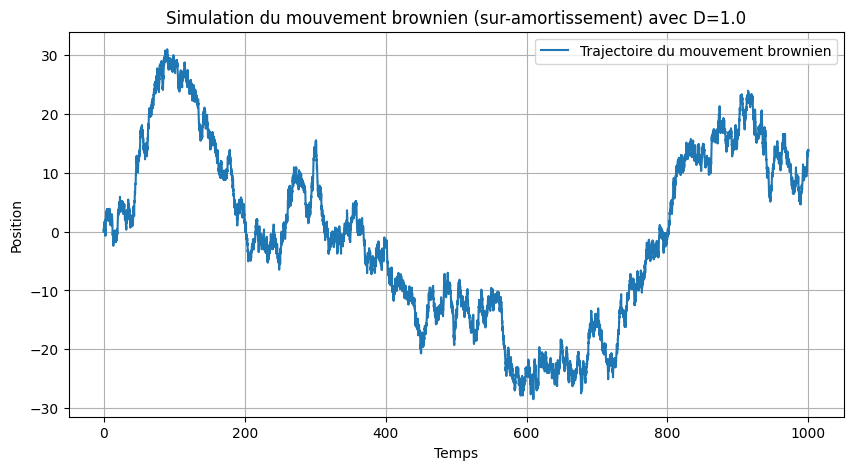

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from free_particle import euler_maruyama

# Paramètres de la simulation
step = 10000 # Nombre de pas de temps
dt = 0.1 # Pas de temps
gamma = 1.0 # Coefficient de friction
D = 1.0 # Coefficient de diffusion
x0 = 0.0 # Position initiale

# Simulation du mouvement brownien
T = step*dt # Temps total de simulation
x = euler_maruyama(D, gamma, T, dt)
t = np.arange(0, T, dt)

# Simulation de plusieurs random-walk pour faire la moyenne sur plein
n_walks = 100
x_walks = np.zeros((n_walks, step))
for i in range(n_walks):
    x_walks[i] = euler_maruyama(D, gamma, T, dt)[:, 0]

x_mean = np.mean(x_walks, axis=0)
x_var = np.var(x_walks, axis=0)
print(f"Moyenne sur {n_walks} random-walks : {x_mean}")
print(f"Variance sur {n_walks} random-walks : {x_var}")

# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Trajectoire du mouvement brownien')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) avec D={}'.format(D))
plt.legend()
plt.grid()
plt.show()

In [45]:
print(f"Moyenne sur {n_walks} random-walks : {x_mean.mean()}")
print(f"Variance sur {n_walks} random-walks : {x_var.mean()}")

Moyenne sur 100 random-walks : -0.650280646291555
Variance sur 100 random-walks : 964.0518950242572


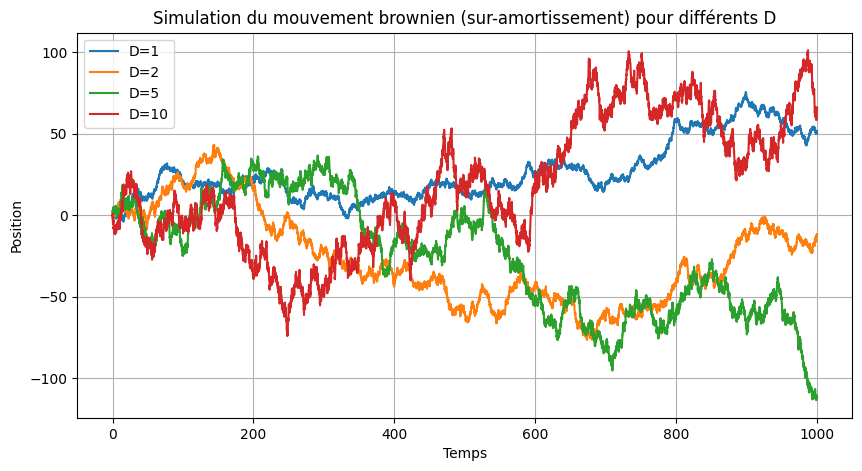

In [49]:
# Avec différents D

D = [1,2,5,10]
x = np.zeros((len(D), step))
for i, d in enumerate(D):
    x[i] = euler_maruyama(d, gamma, T, dt)[:, 0]

# Tracé de la trajectoire
plt.figure(figsize=(10, 5))
for i, d in enumerate(D):
    plt.plot(t, x[i], label='D={}'.format(d))
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Simulation du mouvement brownien (sur-amortissement) pour différents D')
plt.legend()
plt.grid()
plt.show()